In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import urllib

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters as per pdf for record and set. grouping cities in units of 50. 
record_count = 1
set_count = 1


for i, city in enumerate(cities):
        
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    #print ('City')
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #print(city_url)
    record_count += 1

    

    # API request for each city
    try:
        
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    
    except:
        print("Error. City not found")
        pass
    
print("Data Retrieval Complete")
              

            








Beginning Data Retrieval     
-----------------------------
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not found
Error. City not 

In [26]:
city_data_pd = pd.DataFrame(city_data)

lat = city_data_pd["Lat"]
max_temp = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed= city_data_pd["Wind Speed"]

#saving output file
city_data_pd.to_csv("WeatherPy Data.csv")

city_data_pd.count()


City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [27]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1535670275,100,-23.12,-134.97,66.74,16.26
1,mataura,8,NZ,1535670275,100,-46.19,168.86,48.38,4.74
2,sitka,0,US,1535670267,24,37.17,-99.65,98.51,19.51
3,hilo,90,US,1535666160,64,19.71,-155.08,80.96,9.17
4,ponta do sol,24,BR,1535670366,52,-20.63,-46.00,66.92,5.53


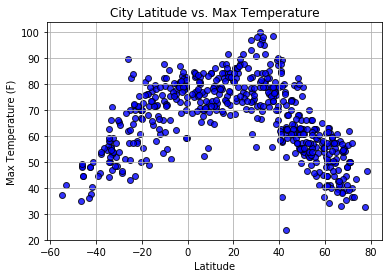

In [28]:
#Latitude vs Temperature Plot

plt.scatter(lat, max_temp, edgecolor="black", facecolors= 'blue', marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs Max temp.png")
plt.show()

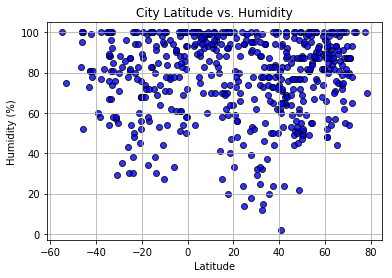

In [29]:
#Latitude vs Humidity plot

plt.scatter(lat, humidity,edgecolor="black", facecolors= 'blue', marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs Humidity.png")
plt.show()

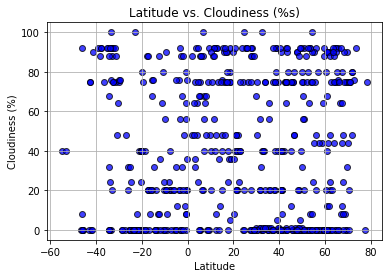

In [30]:
# Latitude vs Cloudiness plot 
plt.scatter(lat, cloudiness, edgecolor="black",facecolors= 'blue', marker="o", 
            alpha=0.75, label="Cities")

plt.title("Latitude vs. Cloudiness (%s)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs Cloudliness.png")
plt.show()

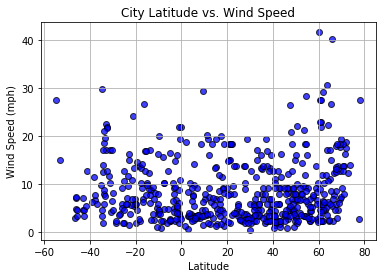

In [31]:
# Latitude vs. Wind Speed Plot
plt.scatter(lat,wind_speed , edgecolor="black", facecolors= 'blue', marker="o", 
            alpha=0.75, label="Cities")


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude vs Wind Speed.png")
plt.show()

